In [52]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import calmap

### Load Your Data

Load your data here. It is then filtered to remove duplicates, such as entrance scanners or inviting a friend. 

These erroneously appear as multiple entries for the same person.

In [ ]:
my_file = 'my-basic-fit-data.json'

In [32]:
with open('my-basic-fit-data.json') as f:
    data = json.load(f)
data['visits']
data = pd.DataFrame(data['visits'])
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%d-%m-%Y %H:%M')
data = data.drop(['date', 'time'], axis=1)
data = data.groupby(pd.Grouper(key='datetime', freq='1H'))
data = data.agg({'club': 'first', 'datetime': 'first'})
data = data.dropna()

### Visits per Club

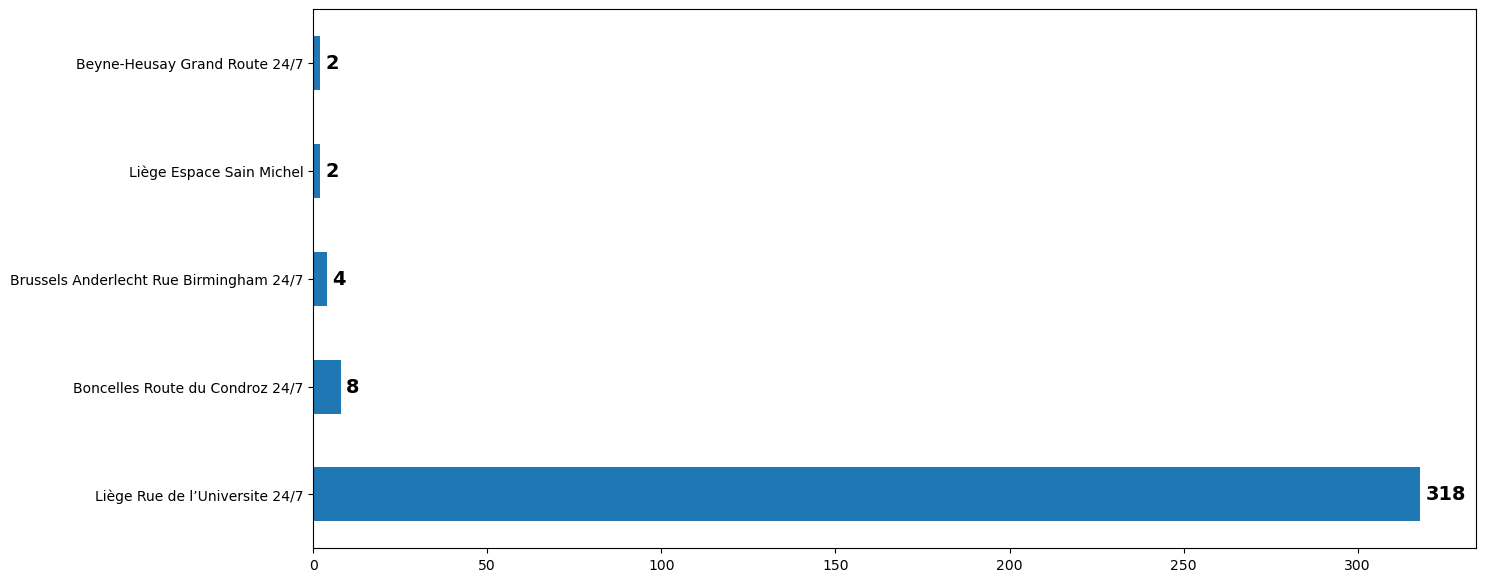

In [34]:
fig, ax = plt.subplots(figsize=(15, 7))
data['club'].apply(lambda x: x.removeprefix('Basic-Fit ')).value_counts().plot(ax=ax, kind='barh')
ax.set_ylabel('')
# Write next to each bar how many times it was visited
for i, v in enumerate(df2['club'].value_counts()):
    ax.text(v + 1.5, i - 0.05, str(v), color='black', fontweight='bold', fontdict={'size': 14})

### Visits per Day and Year

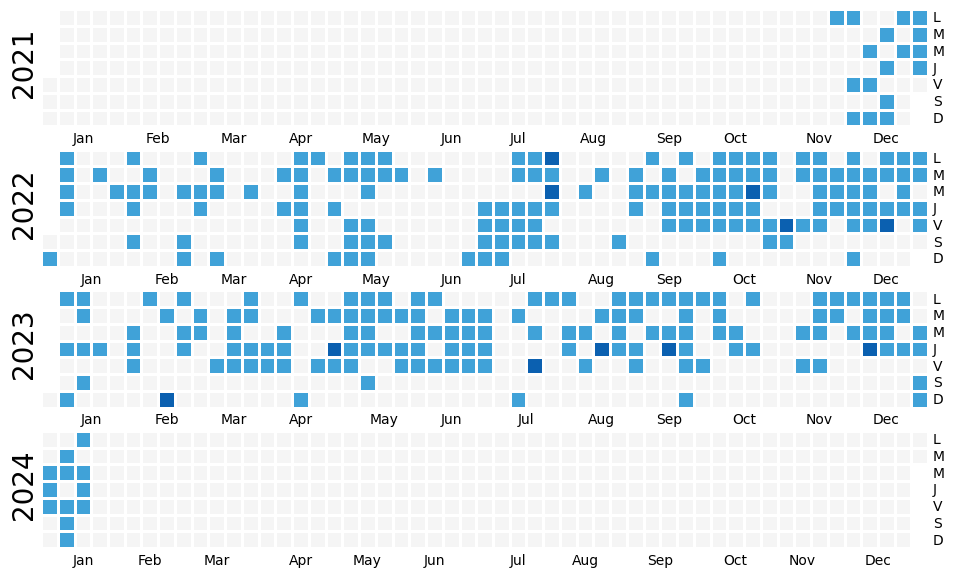

In [74]:
data_perday = data.groupby(pd.Grouper(key='datetime', freq='1D')).agg({'club': 'count', 'datetime': 'first'})['club']
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(45, 7))
for i, year in enumerate([2021, 2022, 2023, 2024]):
    calmap.yearplot(
        data_perday,
        year=year,
        ax=ax[i],
        cmap=ListedColormap([u'whitesmoke', '#40A2D8', '#0B60B0']),
        daylabels='LMMJVSD',
    )
    # Write the year vertically to the left of each plot
    ax[i].text(-0.035, 0.3, year, transform=ax[i].transAxes, rotation=90, fontdict={'size': 20})